                                            WATER QUALITY PREDICTION

PROBLEM STATEMENT:
     This Project focuses on developing a Water Quality Check System that measures key parameters such as pH, turbidity, temperature, dissolved oxygen (DO), total dissolved solids (TDS), and conductivity. The collected data will be used to compute the Water Quality Index (WQI), which classifies water as safe, moderately polluted, or unsafe.

DATA COLLECTION AND PREPROCESSING:
    The water quality dataset from Kaggle was preprocessed using pandas in Python. This involved handling missing values, removing duplicates and outliers

     Import required libraries

In [20]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib

     load the dataset 

In [3]:
data=pd.read_csv('water_quality_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.160466,195.712338,22636.785632,7.235746,336.794067,424.396711,14.376178,68.105888,3.991681,1
1,7.187738,193.202237,21263.028076,7.117409,333.997161,430.163405,14.206928,64.807703,3.957064,0
2,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0
3,7.078913,196.886558,21539.185679,7.104867,335.223406,429.400333,14.344261,65.289765,3.909317,0
4,7.052283,194.971523,21659.468727,7.101790,335.669903,425.620822,14.100794,66.178504,3.989340,0


In [4]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

EXPLORATORY DATA ANALYSIS:
    Using some visual representation find an outliers and remove for result accuracy here we are using boxplot

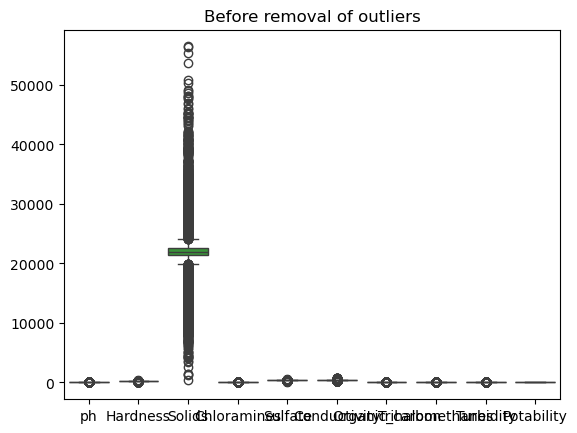

In [5]:
sns.boxplot(data=data)
plt.title('Before removal of outliers')
plt.show()


There is lots of outliered data from solids and minimal amount of outlier in other feature so remove outliers by following way

In [6]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Apply to your dataset
data_clean = remove_outliers_iqr(data)

print("Original rows:", data.shape[0])
print("Rows after outlier removal:", data_clean.shape[0])

Original rows: 10000
Rows after outlier removal: 7961


The number of Rows as reduced as we understand from previous output the outliers are removed and reduced number of rows are 7961

In [7]:
data_clean.shape

(7961, 10)

In [8]:
data_clean.to_csv("data_clean.csv")

MODEL SELECTION AND DEVELOPMENT:

This project used simple machine learning models like Logistic Regression, Decision Tree, and Random Forest to predict water quality from a dataset. The models were trained and tested for accuracy, with the best-performing model selected for reliable predictions.
 This will be dicided from accuracy lineplot


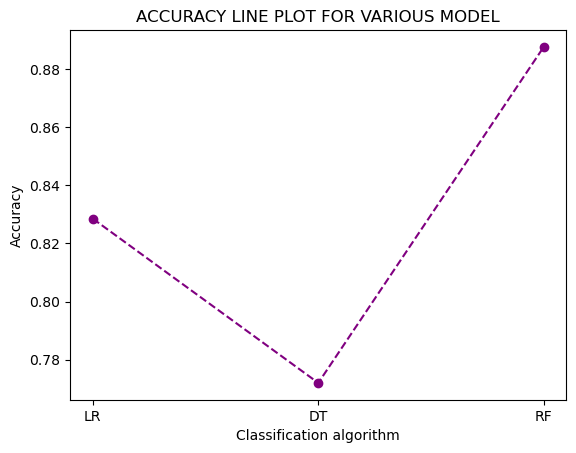

In [35]:
x=['LR','DT','RF']
y=[0.8285,0.772,0.8876]
plt.plot(x,y,marker='o' ,color='purple',linestyle='--')
plt.title('ACCURACY LINE PLOT FOR VARIOUS MODEL')
plt.xlabel('Classification algorithm')
plt.ylabel("Accuracy")
plt.show()

comparitivly random forest have an higher accuracy so I choose RandomForest algorithm for classification

RANDOM FOREST ALGORITHM:

Import required libraries

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Feature selection for input and output

In [37]:
x=data_clean[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
y=data_clean['Potability']

spliting the dataset into an TRAINING and TESTING data for the need of testing our model

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

the following code is an actual way of fitting the model to an prediction

In [39]:
model=RandomForestClassifier(n_estimators=1000,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

Now our model is ready to predict the x_test because of using this x_test can be easily evaluated by comparing actual machine prediction and y_test  which we seperated previously

In [40]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

EVALUATION METRICS:
    

In [41]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.8876333961079724


 The accuracy of RandomForesClassifier was 88% it is enough for research level

In [17]:
print(classification_report(y_test,y_pred,target_names=['potable','nonpotable']))

              precision    recall  f1-score   support

     potable       0.88      0.88      0.88       755
  nonpotable       0.89      0.89      0.89       838

    accuracy                           0.89      1593
   macro avg       0.89      0.89      0.89      1593
weighted avg       0.89      0.89      0.89      1593



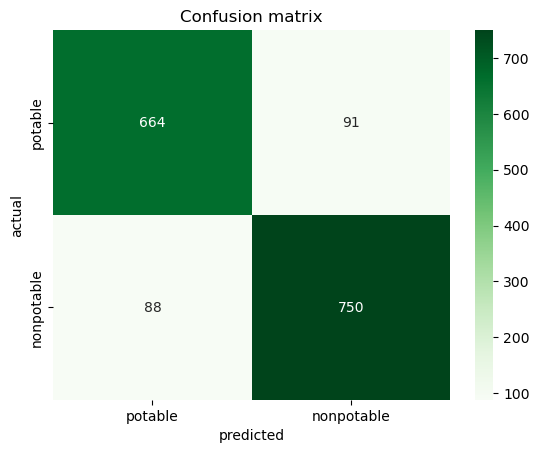

In [42]:
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Greens',
            xticklabels=['potable','nonpotable'],
            yticklabels=['potable','nonpotable'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion matrix')
plt.show()

In [43]:
joblib.dump(model,'water_quality_predict.pkl', compress=9)

['water_quality_predict.pkl']

The model has been saved as 'water_quality_predict.pkl'